In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [3]:
ca_or = housing_raw.loc[housing_raw["region_name"].str[-2:].isin(["CA", "OR", "WA"])]

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [4]:
ca_or = ca_or.assign(
    price_range = pd.cut(
                    ca_or.loc[:,"median_active_list_price"],
                    [0, 400000, 600000, 2000000],
                    labels=["0-400k", "400k-600k","600k+"]),
    state = ca_or["region_name"].str[-2:]
)

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400k-600k,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400k,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400k,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400k,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400k-600k,WA


<Axes: xlabel='price_range', ylabel='inventory'>

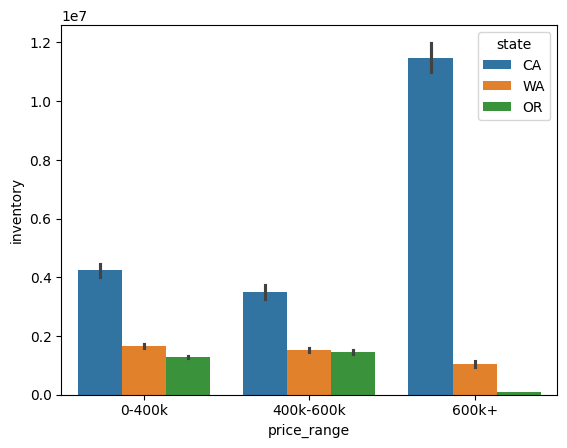

In [5]:
import seaborn as sns

sns.barplot(
    x="price_range",
    y="inventory",
    hue="state",
    estimator=sum,
    data=ca_or)

In [6]:
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index="price_range",
                                                             columns="state",
                                                             values="inventory",
                                                             aggfunc="sum")

ca_or.head()

/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_93431/1837196964.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index="price_range",
/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_93431/1837196964.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index="price_range",


state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


<Axes: xlabel='price_range'>

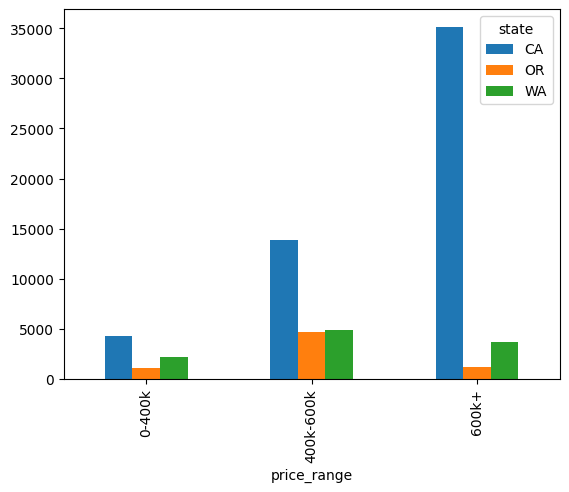

In [7]:
ca_or.plot.bar()

In [8]:
import numpy as np

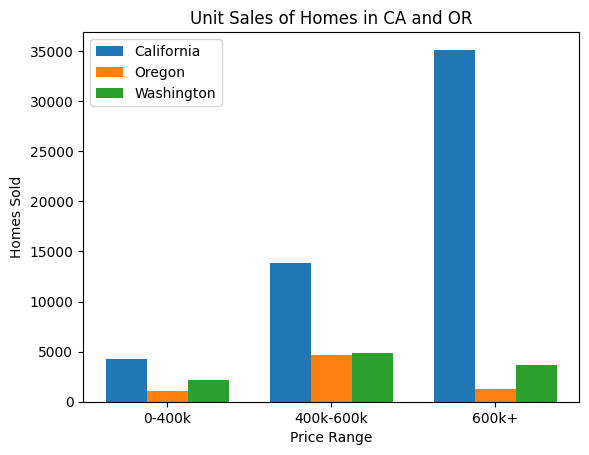

In [9]:
fig, ax = plt.subplots()

width = .25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1, 
    ca_or["CA"], 
    label="California",
    width=width
)

ax.bar(
    x2, 
    ca_or["OR"], 
    label="Oregon", 
    width=width
)


ax.bar(
    x3, 
    ca_or["WA"], 
    label="Washington", 
    width=width
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xlabel('Price Range')
ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index)

# plt.xticks(
#     x2, 
#     ca_or.index,
#     rotation=45
# )

ax.legend()

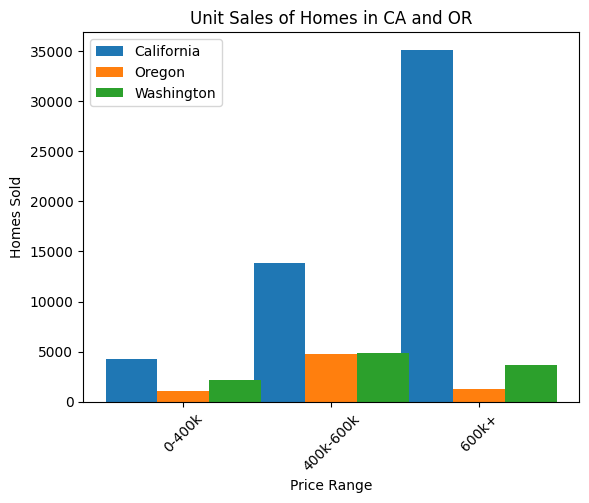

In [12]:
fig, ax = plt.subplots()

width = .35

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1, 
    ca_or["CA"], 
    label="California",
    width=width
)

ax.bar(
    x2, 
    ca_or["OR"], 
    label="Oregon", 
    width=width
)


ax.bar(
    x3, 
    ca_or["WA"], 
    label="Washington", 
    width=width
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xlabel('Price Range')
# ax.set_xticks(x2)
# ax.set_xticklabels(ca_or.index)

plt.xticks(
    x2, 
    ca_or.index,
    rotation=45
)

ax.legend()